Importing The Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

Loading the Dataset

In [2]:
Email_df=pd.read_csv("spambase_csv.csv")
print("\n\nThe Shape Of the dataset is : ",Email_df.shape)
print("\n\nThe Attributes of the dataset is : ",Email_df.columns)



The Shape Of the dataset is :  (4601, 58)


The Attributes of the dataset is :  Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', '

Pre-Processing the data (Handling missing values)

In [3]:
print("The Number of Missing Values in the dataset\n")
Email_df.isnull().sum()

The Number of Missing Values in the dataset



word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Feature Engineering Techniques

In [4]:
X = Email_df.drop(columns=['class']) 
y = Email_df['class']

In [5]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

Split the data into training, testing and validation sets.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the model. Test the model. Measure the performance of the trained model.

1) Linear Kernal

In [7]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)
accuracy_linear = svm_linear.score(X_test, y_test)
print("Accuracy (Linear Kernel):", accuracy_linear)

Accuracy (Linear Kernel): 0.9229098805646037


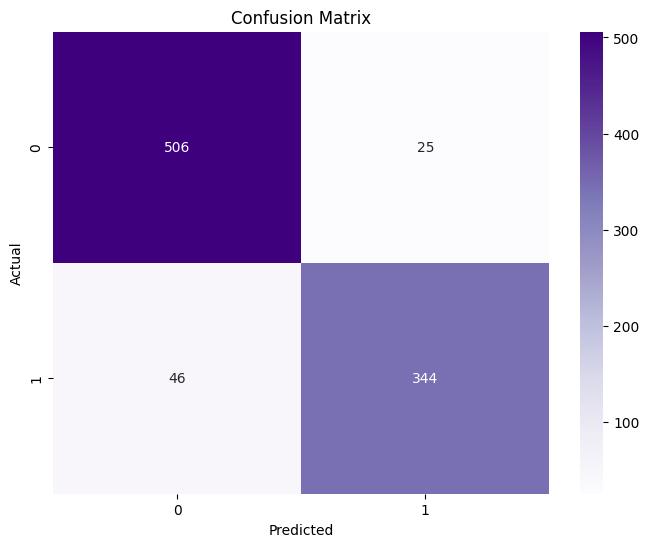

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples")
#colors available: Blues, inferno, Greens
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

2) Polynomial kernal

In [9]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred = svm_poly.predict(X_test)
accuracy_poly = svm_poly.score(X_test, y_test)
print("Accuracy (Polynomial Kernel):", accuracy_poly)

Accuracy (Polynomial Kernel): 0.6254071661237784


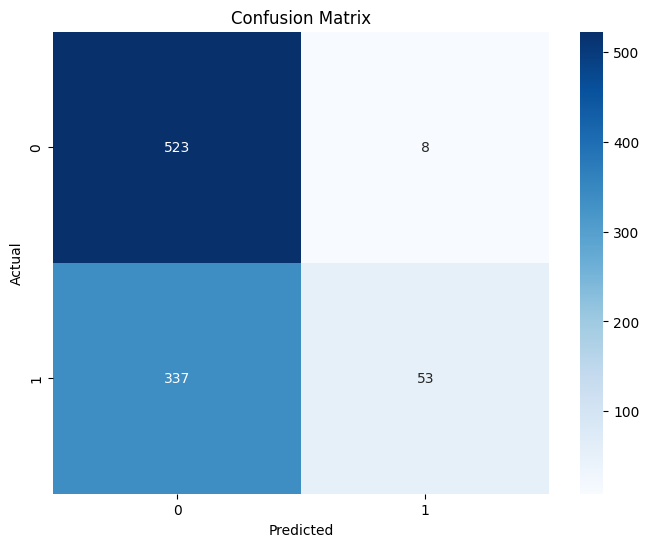

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

3) Sigmoid kernal

In [11]:
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
y_pred = svm_sigmoid.predict(X_test)
accuracy_sigmoid = svm_sigmoid.score(X_test, y_test)
print("Accuracy (Sigmoid Kernel):", accuracy_sigmoid)

Accuracy (Sigmoid Kernel): 0.6351791530944625


Represent the results using graphs.

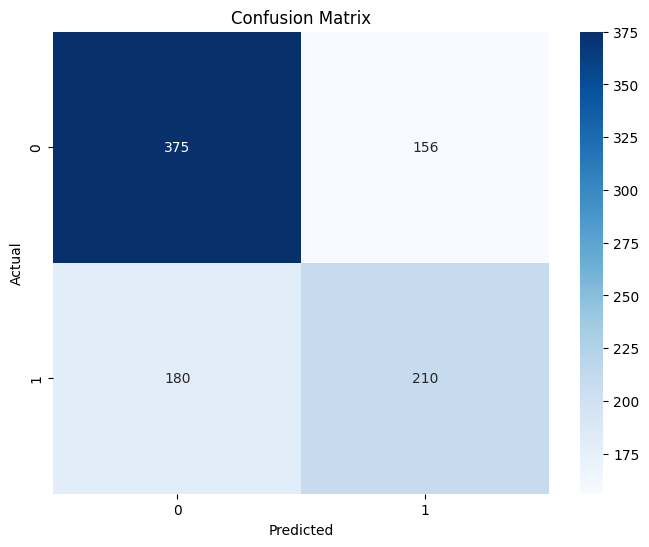

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [13]:
print("\n\nAccuracy (Linear Kernel)     : ", accuracy_linear*100)
print("Accuracy (Polynomial Kernel) : ", accuracy_poly*100)
print("Accuracy (Sigmoid Kernel)    : ", accuracy_sigmoid*100)



Accuracy (Linear Kernel)     :  92.29098805646036
Accuracy (Polynomial Kernel) :  62.54071661237784
Accuracy (Sigmoid Kernel)    :  63.51791530944625
